## Logistic Regression

In [83]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Loading the Iris dataset
df = pd.read_csv("Iris.csv")

print(df.head())

df["Target"] = df["Species"]

df["Target"] = df["Target"].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 1})
print(df.head(1000))
print(df.dtypes)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0           

In [84]:

# Select features and target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Target'].values

# Scale the feature values
X = preprocessing.scale(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [85]:
# Fit the logistic regression model to the training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test data and reshape the output
y_pred = log_reg.predict(X_test)

### Measuring Model Performance


To evaluate a model's performance, it is essential to consider both the overall performance and the performance of each individual class. For the Iris dataset, which has a balanced number of instances for each class, accuracy serves as an appropriate metric for assessing the model's classification performance. The accuracy score, which indicates the proportion of correct predictions made by the model, can be easily obtained using the score() method from the scikit-learn library. This method provides a quick assessment of how well the model is performing across all classes combined.

In [86]:
# Use the score method to calculate the accuracy of the logistic regression model.
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))


Accuracy: 1.0


You can also check how the model did for different classes. The confusion matrix shows us that the model found instances of the species Versicolor the most challenging to classify correctly.  

In [87]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Predict using your model
# y_pred = model.predict(X_test)

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Use binary class names
class_names = ['Iris-setosa', 'Not Iris-setosa']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# Create DataFrame
cm_df = pd.DataFrame(conf_mat, columns=class_names, index=class_names)
print(cm_df)


                 Iris-setosa  Not Iris-setosa
Iris-setosa               13                0
Not Iris-setosa            0               25


In [88]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate the average F1 score
av_f1 = f1_score(y_test, y_pred, average='micro')
print(av_f1)

# Calculate the F1 score for each individual class
f = f1_score(y_test, y_pred, average=None)

# Identify the lowest F1 score among the calculated scores
lowest_score = min(f)

# Determine the class corresponding to the lowest F1 score
difficult_class = classes[list(f).index(lowest_score)]

# Print the most challenging class based on the lowest F1 score
print('Most challenging class:', difficult_class)

1.0
Most challenging class: Iris-setosa


In [89]:
# Precision and Recall for virginica
prec = precision_score(y_test == classes.index('Iris-setosa'), y_pred == classes.index('Iris-setosa'))
rec = recall_score(y_test == classes.index('Iris-setosa'), y_pred == classes.index('Iris-setosa'))

print('Precision:', prec)
print('Recall:', rec)


Precision: 1.0
Recall: 1.0


Accuracy: 0.9736842105263158
            Setosa  Versicolor  Virginica
Setosa          13           0          0
Versicolor       0          15          1
Virginica        0           0          9


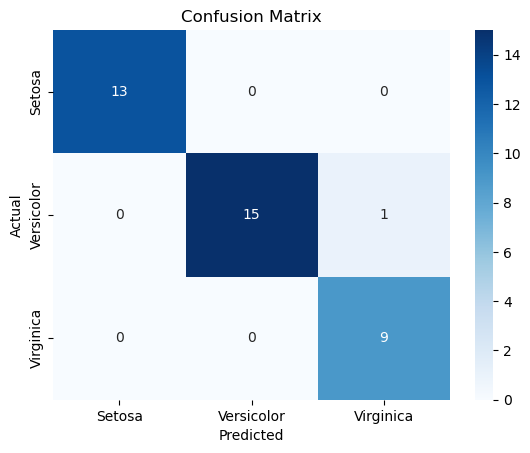

Precision (macro): 0.9666666666666667
Recall (macro): 0.9791666666666666
F1 score (macro): 0.9717034521788341


In [90]:
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# Map target to 3 classes
df["Target"] = df["Species"].map({
    'Iris-setosa':0, 
    'Iris-versicolor':1, 
    'Iris-virginica':2
})

# Features and target
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y = df["Target"].values

# Scale features
X = preprocessing.scale(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train Logistic Regression (multi-class)
log_reg = LogisticRegression(solver='lbfgs', max_iter=200)  # default handles multi-class automatically
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
class_names = ['Setosa','Versicolor','Virginica']
cm_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)
print(cm_df)

# Heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 score (macro):", f1_score(y_test, y_pred, average='macro'))
